In [1]:
import os
import tensorflow as tf
import pickle
import importlib


In [2]:
# mount google drive to download saved models and test (validation set)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# setup virtual directories
VDIR_PROJECT = '/content/skin_cancer'
VDIR_PROJECT_TRAIN_VAL_SET = VDIR_PROJECT+'/train_val_set'
VDIR_PROJECT_TESTSET = VDIR_PROJECT+'/test_set'
VDIR_PROJECT_TESTSET_VAL = VDIR_PROJECT_TESTSET+'/val'
VDIR_PROJECT_MODELS = VDIR_PROJECT+'/models'
os.makedirs(VDIR_PROJECT_TRAIN_VAL_SET, exist_ok=True)
os.makedirs(VDIR_PROJECT_TESTSET, exist_ok=True)
os.makedirs(VDIR_PROJECT_MODELS, exist_ok=True)

# define source directory from Gdrive
GDIR_PROJECT_EDA_S1 = '/content/drive/MyDrive/AAI-521/Module7/TeamProject/EDA_PrePro/S1'

# COPY S1 images with no augmentation. Only validation set is needed for evaluation
dataset_filename = 'S1_images.zip'
GDIR_DATASET_ZIPPED = os.path.join(GDIR_PROJECT_EDA_S1, dataset_filename)
!cp -r {GDIR_DATASET_ZIPPED} {VDIR_PROJECT_TRAIN_VAL_SET}



In [4]:
# unzip
!unzip {VDIR_PROJECT_TRAIN_VAL_SET}/{dataset_filename} -d {VDIR_PROJECT_TESTSET}/

Streaming output truncated to the last 5000 lines.
  inflating: /content/skin_cancer/test_set/train/nv/ISIC_0028720.jpg  
  inflating: /content/skin_cancer/test_set/train/nv/ISIC_0024895.jpg  
  inflating: /content/skin_cancer/test_set/train/nv/ISIC_0032198.jpg  
  inflating: /content/skin_cancer/test_set/train/nv/ISIC_0033346.jpg  
  inflating: /content/skin_cancer/test_set/train/nv/ISIC_0031035.jpg  
  inflating: /content/skin_cancer/test_set/train/nv/ISIC_0024401.jpg  
  inflating: /content/skin_cancer/test_set/train/nv/ISIC_0031863.jpg  
  inflating: /content/skin_cancer/test_set/train/nv/ISIC_0028248.jpg  
  inflating: /content/skin_cancer/test_set/train/nv/ISIC_0027791.jpg  
  inflating: /content/skin_cancer/test_set/train/nv/ISIC_0033036.jpg  
  inflating: /content/skin_cancer/test_set/train/nv/ISIC_0025786.jpg  
  inflating: /content/skin_cancer/test_set/train/nv/ISIC_0026151.jpg  
  inflating: /content/skin_cancer/test_set/train/nv/ISIC_0034073.jpg  
  inflating: /content/skin

In [5]:
# define class list used during training
class_list = {'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

In [6]:
# copy trained models
GDIR_PROJECT_TRAINING_MODELS = '/content/drive/MyDrive/AAI-521/Module7/TeamProject/Training/models'

!cp -r {GDIR_PROJECT_TRAINING_MODELS}/* {VDIR_PROJECT_MODELS}

cp: error reading '/content/drive/MyDrive/AAI-521/Module7/TeamProject/Training/models/gan/a/ckpt-2.data-00000-of-00001': Software caused connection abort
cp: failed to close '/content/drive/MyDrive/AAI-521/Module7/TeamProject/Training/models/gan/a/ckpt-2.data-00000-of-00001': Transport endpoint is not connected
cp: cannot stat '/content/drive/MyDrive/AAI-521/Module7/TeamProject/Training/models/gan/a/ckpt-2.index': Transport endpoint is not connected
cp: cannot stat '/content/drive/MyDrive/AAI-521/Module7/TeamProject/Training/models/gan/a/ckpt-3.data-00000-of-00001': Transport endpoint is not connected
cp: cannot stat '/content/drive/MyDrive/AAI-521/Module7/TeamProject/Training/models/gan/a/ckpt-3.index': Transport endpoint is not connected
cp: cannot stat '/content/drive/MyDrive/AAI-521/Module7/TeamProject/Training/models/gan/a/ckpt-4.data-00000-of-00001': Transport endpoint is not connected
cp: cannot stat '/content/drive/MyDrive/AAI-521/Module7/TeamProject/Training/models/gan/a/ckpt-

In [7]:
# copy evaluation_functions.py from gdrive to current working directory
GDIR_PROJECT_COMMON_FUNCTIONS = '/content/drive/MyDrive/AAI-521/Module7/TeamProject/Common_Functions'

!cp -r {GDIR_PROJECT_COMMON_FUNCTIONS}/* ./

In [10]:
import evaluation_functions as ef
importlib.reload(ef)

evaluation_functions version: 0.0.3 is loaded.

evaluation_functions version: 0.0.3 is loaded.



<module 'evaluation_functions' from '/content/evaluation_functions.py'>

In [8]:
# define function that loads model weights (keras) & history (pickle)

def load_model_history_keras(models_dir, model_name):
  model_path = models_dir+'/'+model_name+'/model.keras'
  history_path = models_dir+'/'+model_name+'/training_history.pkl'

  model = tf.keras.models.load_model(model_path)
  with open(history_path, 'rb') as file:
    history = pickle.load(file)

  return model, history



Available Metrics1: ['categorical_accuracy', 'loss']

Here1: metrics: ['categorical_accuracy' 'loss']

Metrics to display: ['categorical_accuracy' 'loss']

Num Rows:  1
plotA 0 train/val curves for metric categorical_accuracy

plotA 1 train/val curves for metric loss



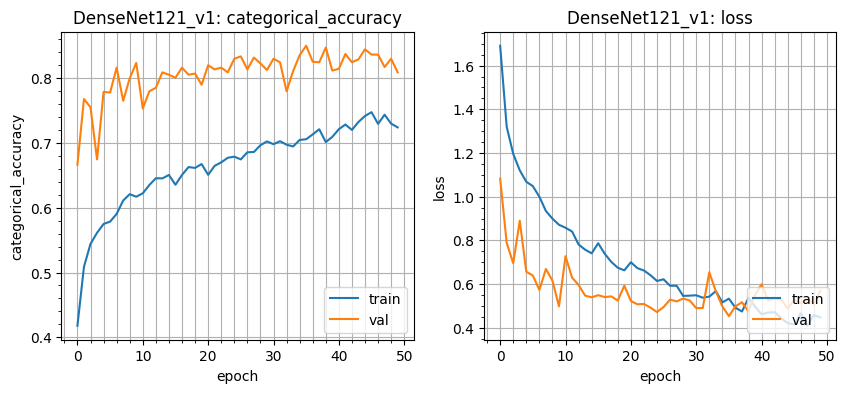

Found 1094 files belonging to 7 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 6s/step
              precision    recall  f1-score   support

       akiec       0.26      0.73      0.38        30
         bcc       0.54      0.43      0.48        35
         bkl       0.53      0.58      0.56        86
          df       0.67      0.50      0.57         8
         mel       0.21      0.35      0.26        46
          nv       0.97      0.87      0.92       876
        vasc       0.50      0.77      0.61        13

    accuracy                           0.81      1094
   macro avg       0.53      0.60      0.54      1094
weighted avg       0.87      0.81      0.83      1094



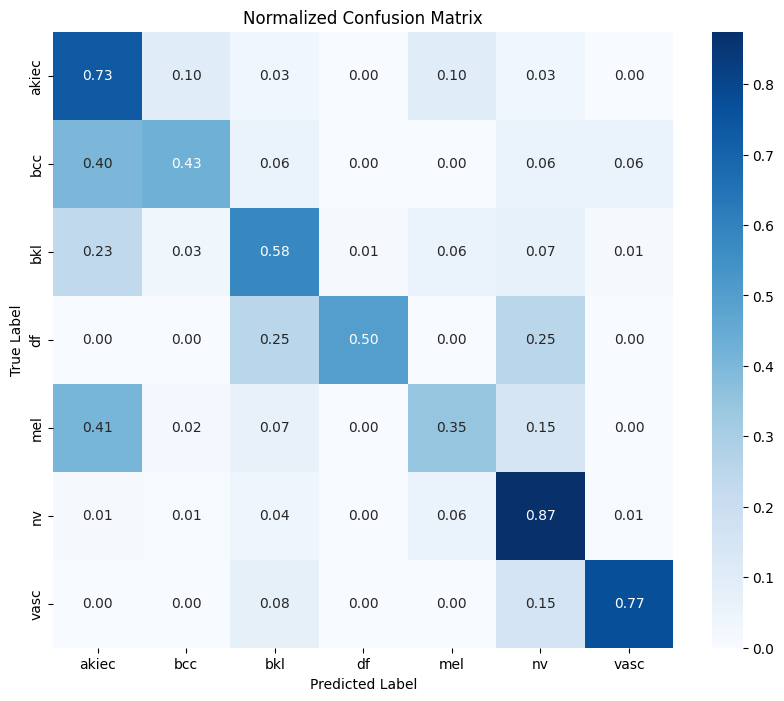

Available Metrics1: ['categorical_accuracy', 'loss']

Here1: metrics: ['categorical_accuracy' 'loss']

Metrics to display: ['categorical_accuracy' 'loss']

Num Rows:  1
plotA 0 train/val curves for metric categorical_accuracy

plotA 1 train/val curves for metric loss



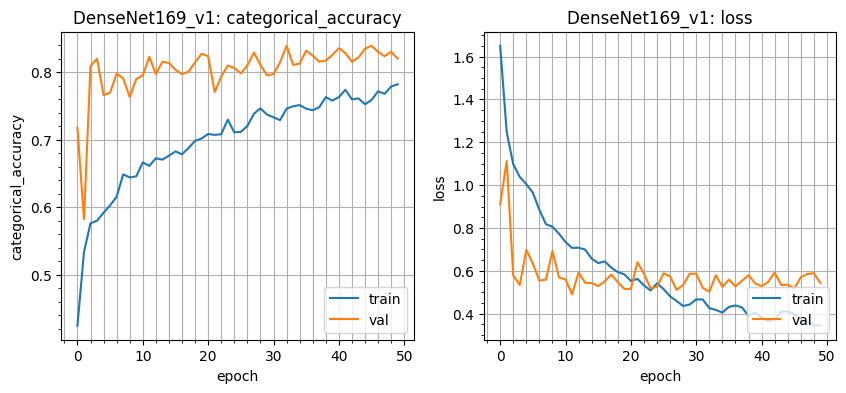

Found 1094 files belonging to 7 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 85ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 7s/step
              precision    recall  f1-score   support

       akiec       0.39      0.43      0.41        30
         bcc       0.49      0.54      0.51        35
         bkl       0.59      0.56      0.57        86
          df       0.44      0.50      0.47         8
         mel       0.22      0.41      0.29        46
          nv       0.97      0.91      0.94       876
        vasc       0.50      0.77      0.61        13

    accuracy                           0.83      1094
   macro avg       0.51      0.59      0.54      1094
weighted avg       0.86      0.83      0.85      1094



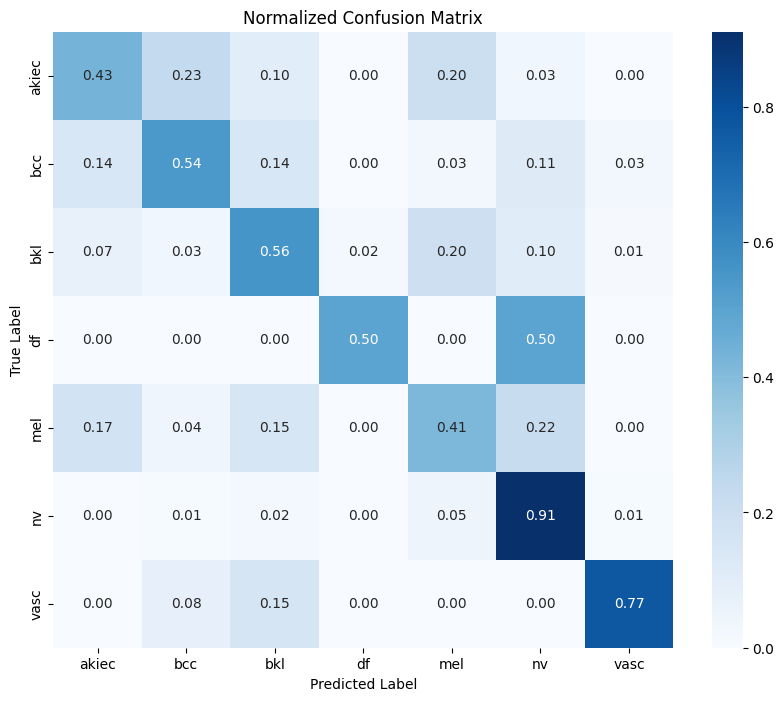

Available Metrics1: ['categorical_accuracy', 'loss']

Here1: metrics: ['categorical_accuracy' 'loss']

Metrics to display: ['categorical_accuracy' 'loss']

Num Rows:  1
plotA 0 train/val curves for metric categorical_accuracy

plotA 1 train/val curves for metric loss



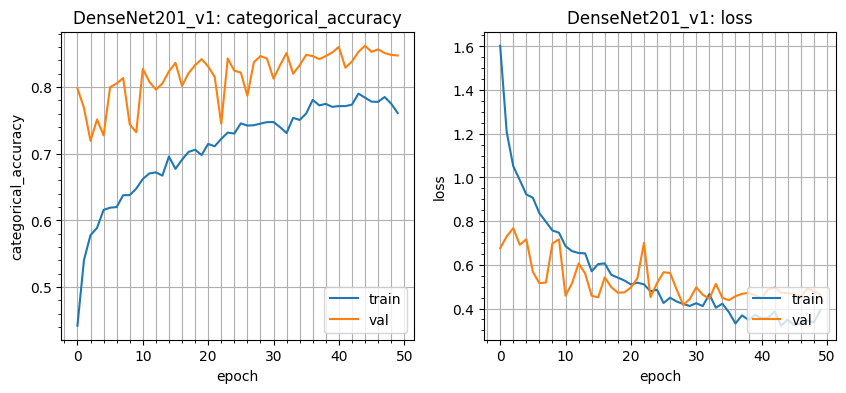

Found 1094 files belonging to 7 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 9s/step
              precision    recall  f1-score   support

       akiec       0.29      0.40      0.34        30
         bcc       0.54      0.60      0.57        35
         bkl       0.68      0.63      0.65        86
          df       0.23      0.38      0.29         8
         mel       0.30      0.39      0.34        46
          nv       0.97      0.93      0.95       876
        vasc       0.56      0.77      0.65        13

    accuracy                           0.85      1094
   macro avg       0.51      0.58      0.54      1094
weighted avg       0.87      0.85      0.86      1094



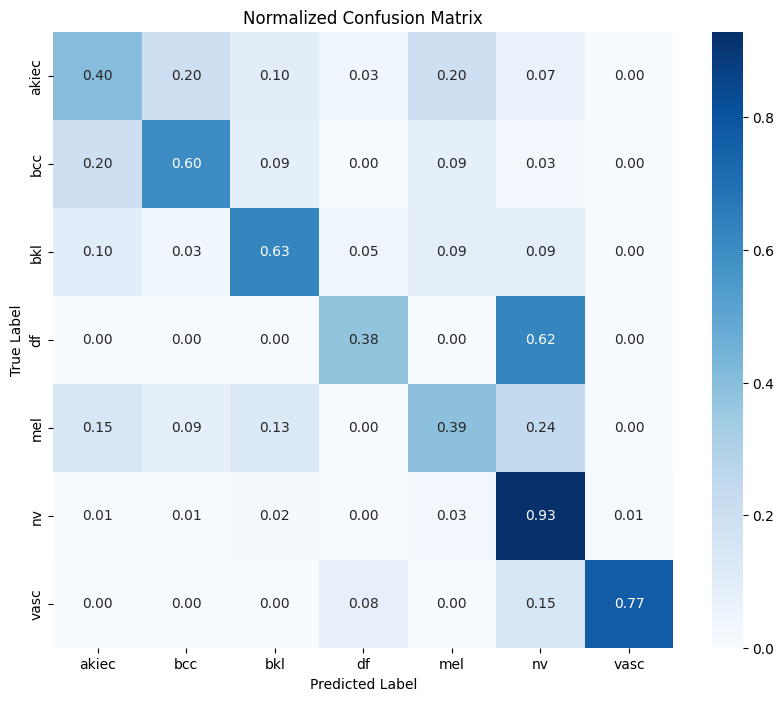

Available Metrics1: ['categorical_accuracy', 'loss']

Here1: metrics: ['categorical_accuracy' 'loss']

Metrics to display: ['categorical_accuracy' 'loss']

Num Rows:  1
plotA 0 train/val curves for metric categorical_accuracy

plotA 1 train/val curves for metric loss



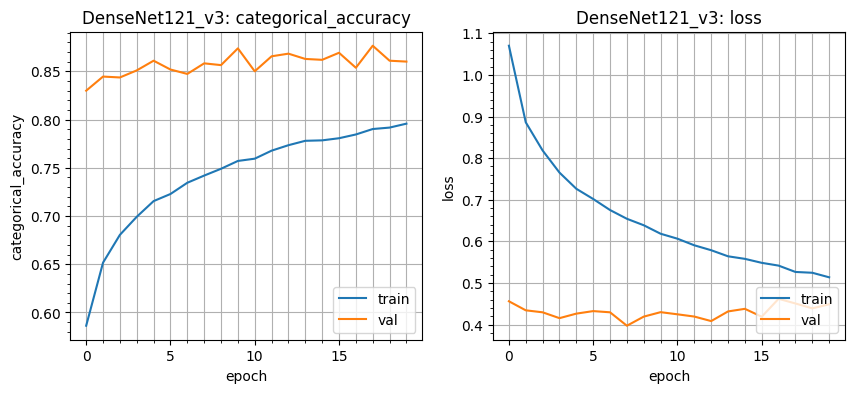

Found 1094 files belonging to 7 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step
              precision    recall  f1-score   support

       akiec       0.50      0.47      0.48        30
         bcc       0.60      0.51      0.55        35
         bkl       0.54      0.57      0.55        86
          df       0.43      0.38      0.40         8
         mel       0.32      0.35      0.33        46
          nv       0.95      0.95      0.95       876
        vasc       0.89      0.62      0.73        13

    accuracy                           0.86      1094
   macro avg       0.60      0.55      0.57      1094
weighted avg       0.86      0.86      0.86      1094



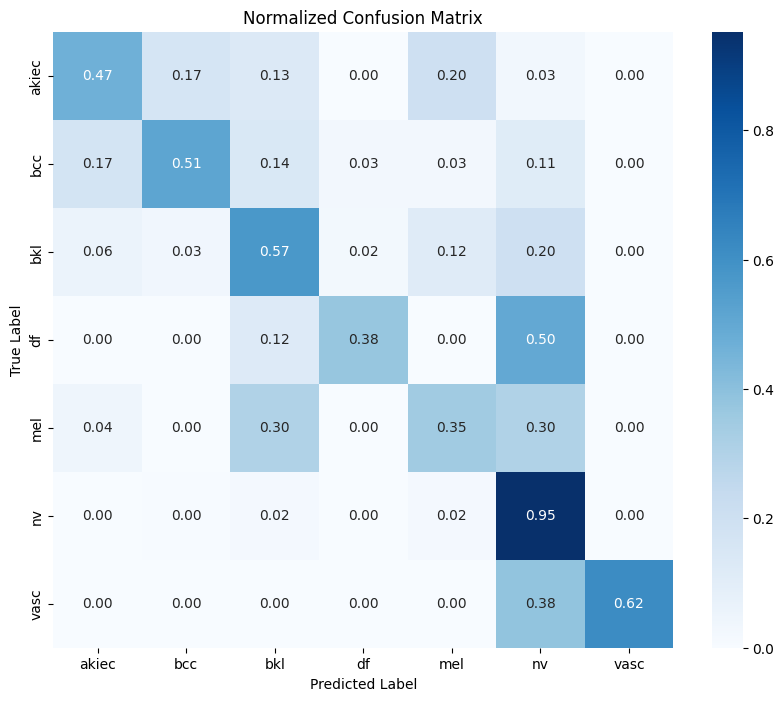

Available Metrics1: ['categorical_accuracy', 'loss']

Here1: metrics: ['categorical_accuracy' 'loss']

Metrics to display: ['categorical_accuracy' 'loss']

Num Rows:  1
plotA 0 train/val curves for metric categorical_accuracy

plotA 1 train/val curves for metric loss



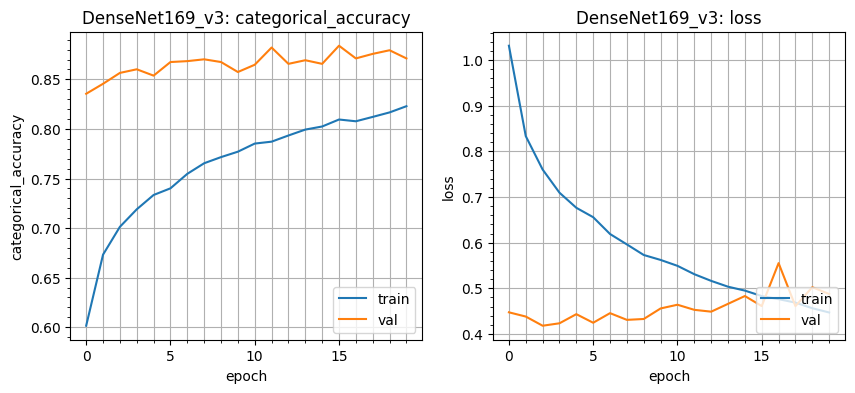

Found 1094 files belonging to 7 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 6s/step
              precision    recall  f1-score   support

       akiec       0.55      0.40      0.46        30
         bcc       0.55      0.66      0.60        35
         bkl       0.59      0.67      0.63        86
          df       0.80      0.50      0.62         8
         mel       0.36      0.35      0.35        46
          nv       0.96      0.95      0.95       876
        vasc       0.77      0.77      0.77        13

    accuracy                           0.87      1094
   macro avg       0.65      0.61      0.63      1094
weighted avg       0.88      0.87      0.87      1094



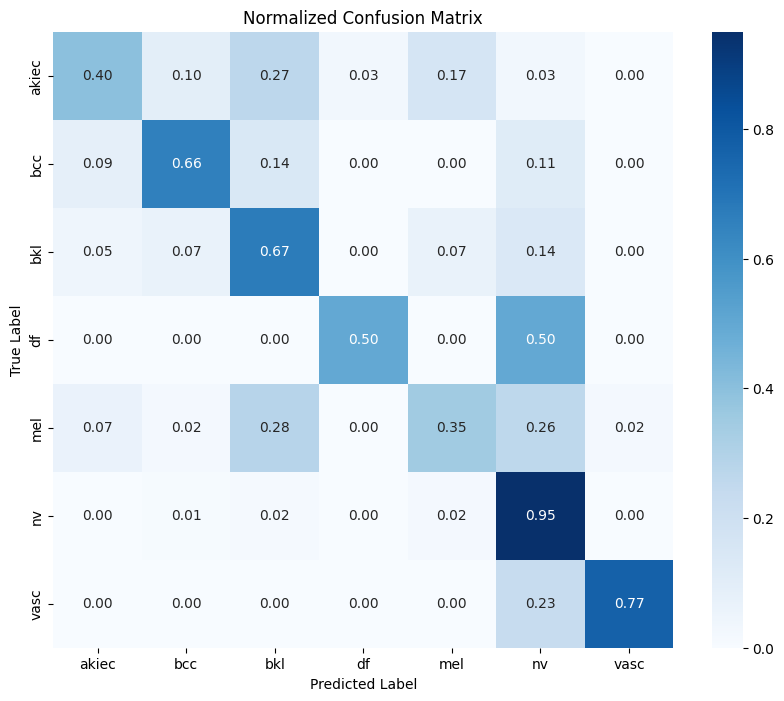

Available Metrics1: ['categorical_accuracy', 'loss']

Here1: metrics: ['categorical_accuracy' 'loss']

Metrics to display: ['categorical_accuracy' 'loss']

Num Rows:  1
plotA 0 train/val curves for metric categorical_accuracy

plotA 1 train/val curves for metric loss



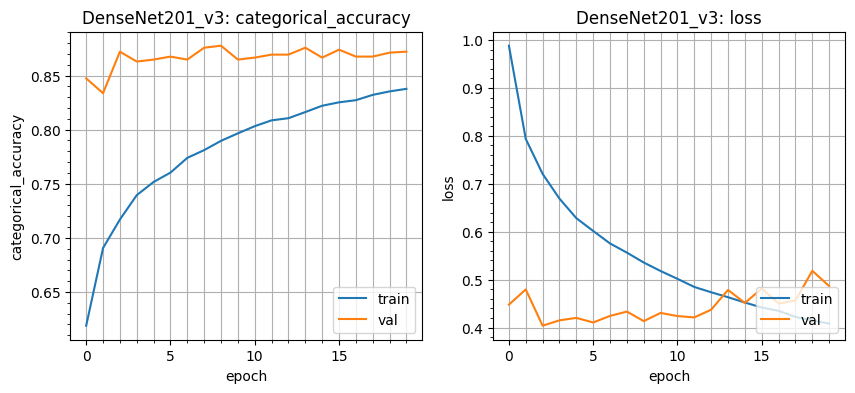

Found 1094 files belonging to 7 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 111ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step
              precision    recall  f1-score   support

       akiec       0.36      0.27      0.31        30
         bcc       0.46      0.60      0.52        35
         bkl       0.63      0.69      0.66        86
          df       0.75      0.38      0.50         8
         mel       0.42      0.28      0.34        46
          nv       0.95      0.96      0.96       876
        vasc       0.71      0.77      0.74        13

    accuracy                           0.87      1094
   macro avg       0.61      0.56      0.57      1094
weighted avg       0.87      0.87      0.87      1094



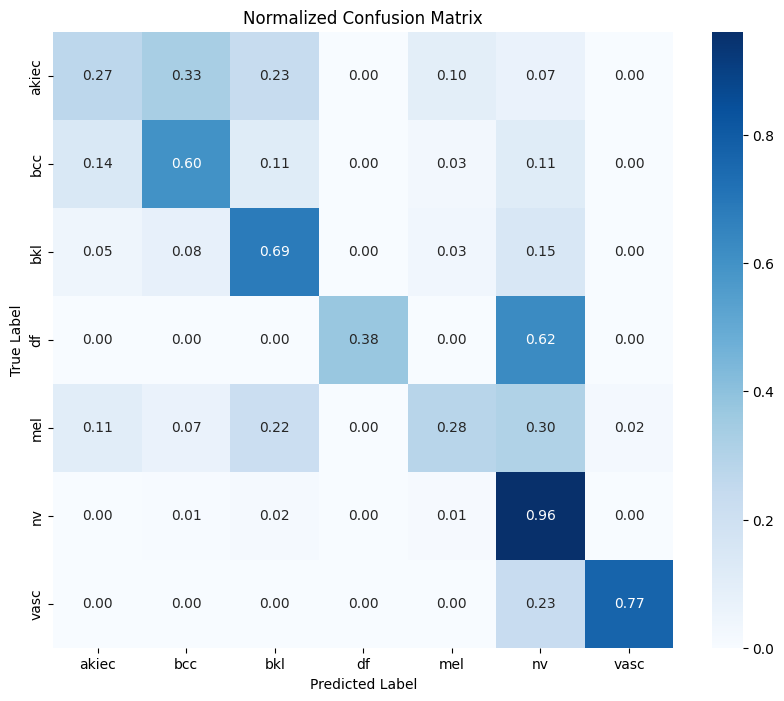

In [11]:
# _v1 are DenseNet models trained without Data Augmentation
# _v3 are DenseNet models trained with Data Augmentation

models_names = ['DenseNet121_v1', 'DenseNet169_v1', 'DenseNet201_v1', 'DenseNet121_v3', 'DenseNet169_v3', 'DenseNet201_v3']
models = [[] for i in range (len(models_names))]
histories = [[] for i in range (len(models_names))]

# load models and histories to evaluate
for i in range(len(models_names)):
  model, history = load_model_history_keras(VDIR_PROJECT_MODELS, models_names[i])
  models[i] = model
  histories[i] = history

  # evaluate
  ef.group5_evaluate(VDIR_PROJECT_TESTSET_VAL,
                     model=model,
                     model_name=models_names[i],
                     class_list =class_list,
                     training_history = history,
                     batch_size=256,
                     image_size = (224,224))



Available Metrics1: ['categorical_accuracy', 'loss']

Here1: metrics: ['categorical_accuracy' 'loss']

Metrics to display: ['categorical_accuracy' 'loss']

Num Rows:  1
plotA 0 train/val curves for metric categorical_accuracy

plotA 1 train/val curves for metric loss



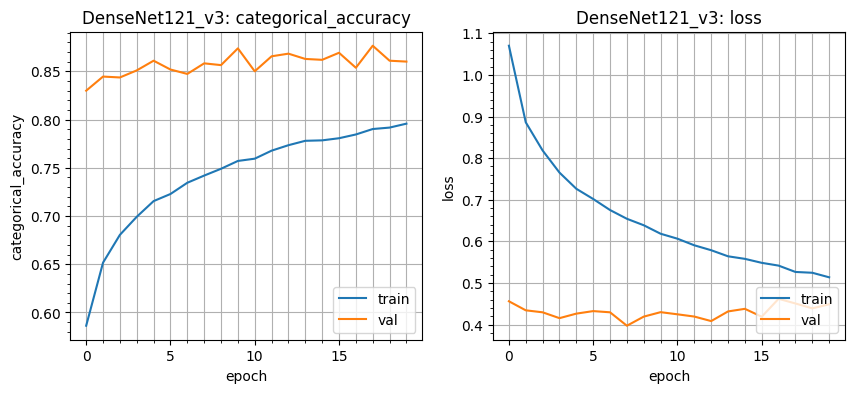

Found 1094 files belonging to 7 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step
              precision    recall  f1-score   support

       akiec       0.50      0.47      0.48        30
         bcc       0.60      0.51      0.55        35
         bkl       0.54      0.57      0.55        86
          df       0.43      0.38      0.40         8
         mel       0.32      0.35      0.33        46
          nv       0.95      0.95      0.95       876
        vasc       0.89      0.62      0.73        13

    accuracy                           0.86      1094
   macro avg       0.60      0.55      0.57      1094
weighted avg       0.86      0.86      0.86      1094



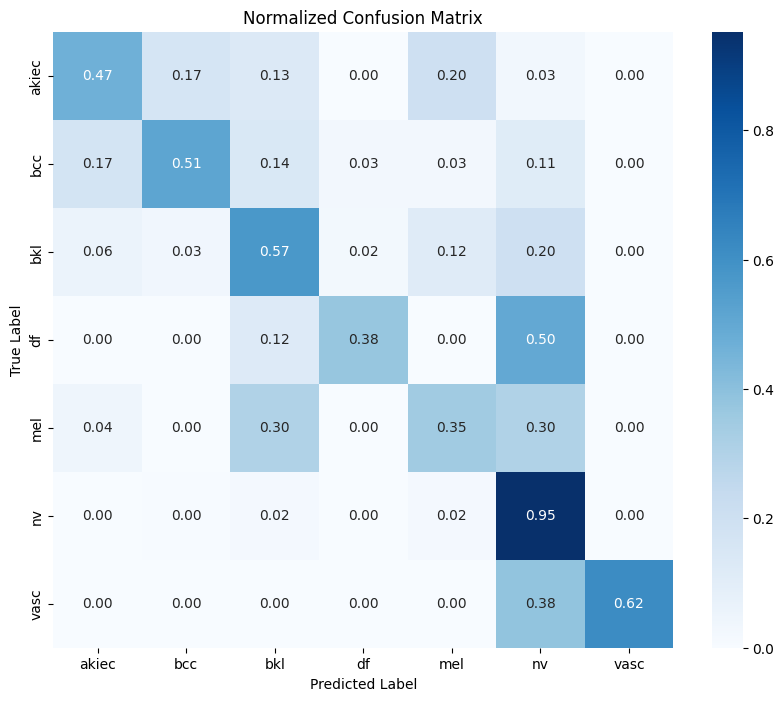

Available Metrics1: ['categorical_accuracy', 'loss']

Here1: metrics: ['categorical_accuracy' 'loss']

Metrics to display: ['categorical_accuracy' 'loss']

Num Rows:  1
plotA 0 train/val curves for metric categorical_accuracy

plotA 1 train/val curves for metric loss



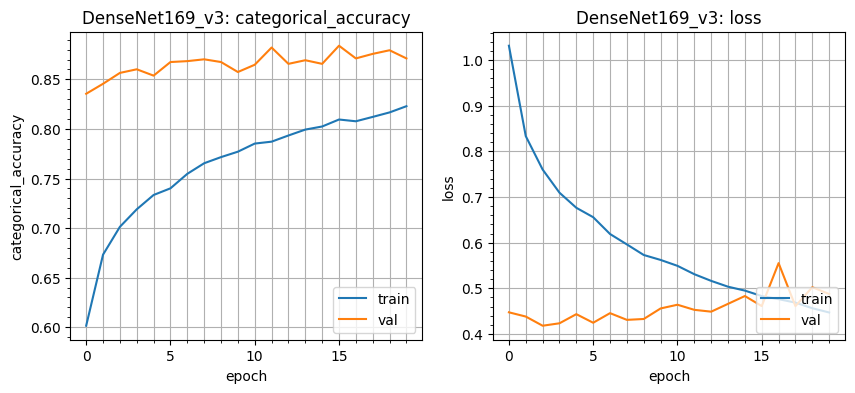

Found 1094 files belonging to 7 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 6s/step
              precision    recall  f1-score   support

       akiec       0.55      0.40      0.46        30
         bcc       0.55      0.66      0.60        35
         bkl       0.59      0.67      0.63        86
          df       0.80      0.50      0.62         8
         mel       0.36      0.35      0.35        46
          nv       0.96      0.95      0.95       876
        vasc       0.77      0.77      0.77        13

    accuracy                           0.87      1094
   macro avg       0.65      0.61      0.63      1094
weighted avg       0.88      0.87      0.87      1094



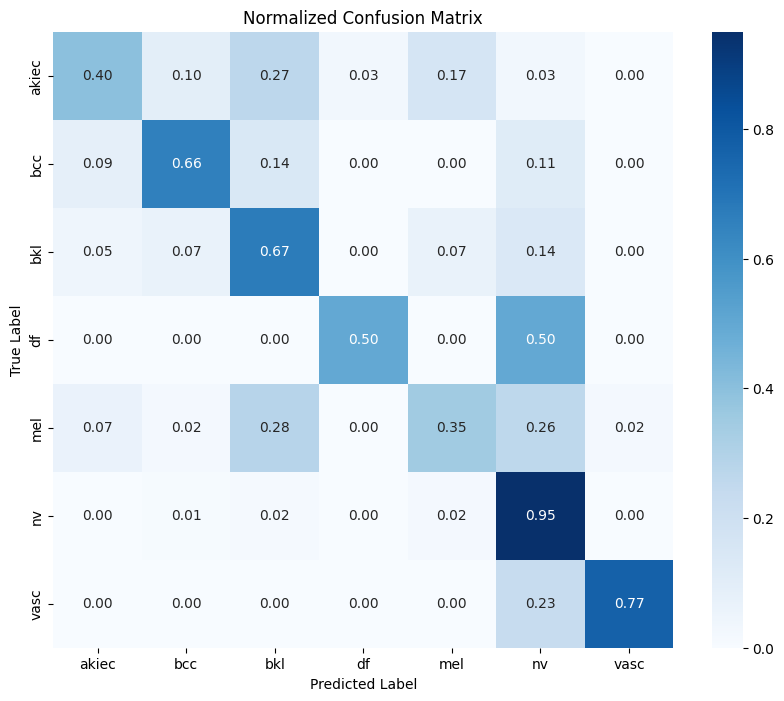

Available Metrics1: ['categorical_accuracy', 'loss']

Here1: metrics: ['categorical_accuracy' 'loss']

Metrics to display: ['categorical_accuracy' 'loss']

Num Rows:  1
plotA 0 train/val curves for metric categorical_accuracy

plotA 1 train/val curves for metric loss



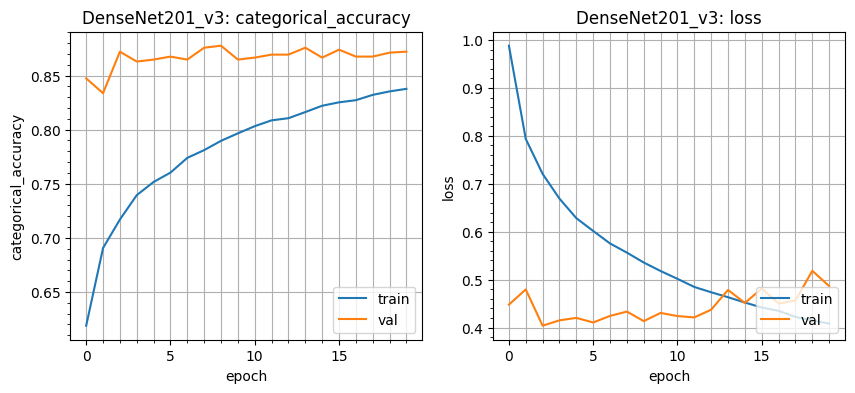

Found 1094 files belonging to 7 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 7s/step
              precision    recall  f1-score   support

       akiec       0.36      0.27      0.31        30
         bcc       0.46      0.60      0.52        35
         bkl       0.63      0.69      0.66        86
          df       0.75      0.38      0.50         8
         mel       0.42      0.28      0.34        46
          nv       0.95      0.96      0.96       876
        vasc       0.71      0.77      0.74        13

    accuracy                           0.87      1094
   macro avg       0.61      0.56      0.57      1094
weighted avg       0.87      0.87      0.87      1094



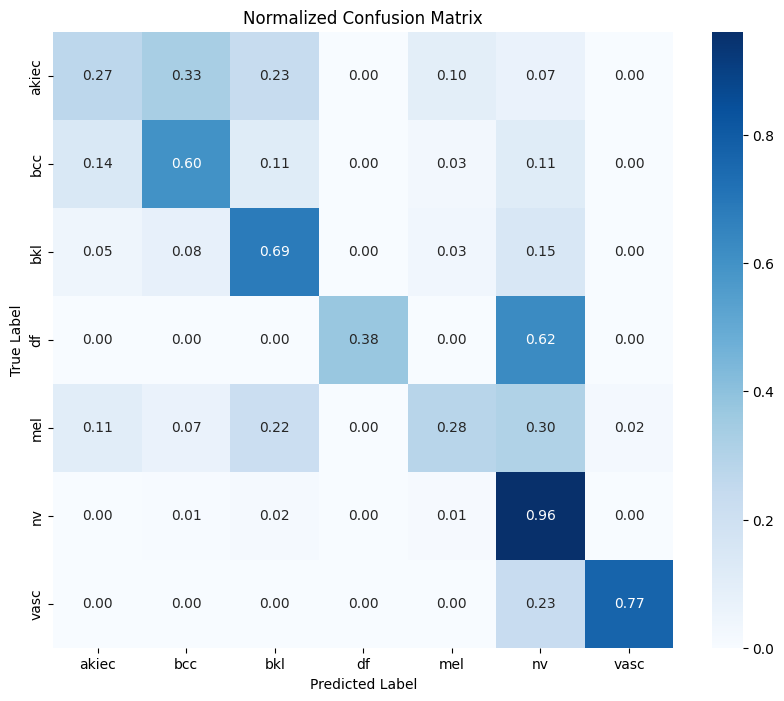

In [18]:
models_names = ['DenseNet121_v3', 'DenseNet169_v3', 'DenseNet201_v3']
models = [[] for i in range (len(models_names))]
histories = [[] for i in range (len(models_names))]

# load models and histories to evaluate
for i in range(len(models_names)):
  model, history = load_model_history_keras(VDIR_PROJECT_MODELS, models_names[i])
  models[i] = model
  histories[i] = history

  # evaluate
  ef.group5_evaluate(VDIR_PROJECT_TESTSET_VAL,
                     model=model,
                     model_name=models_names[i],
                     class_list =class_list,
                     training_history = history,
                     batch_size=256,
                     image_size = (224,224))



In [29]:
# overlay accuracies of all densenet trained without augmentation

# -*- coding: utf-8 -*-
"""Evaluation_Functions.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/10HqxECscJ3GV3LVsjh-SsbnNvysQliPM
"""
version = "0.0.3"

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.applications.densenet import preprocess_input

print(f"evaluation_functions version: {version} is loaded.\n")

# Draw the learning curve(s) based on training history
# primarily compares traning and validation curves

def group5_display_lc2(history=[], metrics=[], train_val = 'both', model_names = []):
  # history: result after fitting model on training (and validation) dataset
  # metrics:
  #   > [(empty)] (default): plot learning curves for all metrics available in history
  #   > [non-empty] : plot learning curves for specified metrics in this list
  # train_val:
  #   > 'both' (default): overlays train learning curve on validation learning curve for a given metric
  #   > 'train' : displays learning curves on training set only (not implemented)
  #   > 'val' : displays learning curves on validation set only (not implemented)
  num_models = len(model_names)
  model_idx = [models_names.index(model_name) for model_name in model_names]

  # print metrics common to both train and val sets available in 'history'
  available_metrics = [key for key in history[0].history.keys() if not key.startswith('val_')]
  print(f"Available Metrics1: {available_metrics}\n")

  if (len(metrics) == 0):
    metrics = np.copy(available_metrics)
    print(f"Here1: metrics: {metrics}\n")
  # print selected metrics to display
  print(f"Metrics to display: {metrics}\n")

  num_metrics = len(metrics)
  max_cols = 2
  num_rows = np.ceil(num_metrics/max_cols).astype(int)
  print("Num Rows: ", num_rows)

  # plot learning curves for each metric listed in metrics
  plt.figure(figsize=(10,4))
  for idx in range(num_models):
    for i, metric in enumerate(metrics):
      print(f"plotA {i} train/val curves for metric {metric}\n")

      # Draw the learning curves and write down your understanding from the graphs.
      plt.subplot(num_rows,max_cols,i+1)
      if metric == 'categorical_accuracy':
        label = 'cat_acc'
      else:
        label = 'loss'

      plt.plot(history[model_idx[idx]].history[metric], label = f"{model_names[idx]}+{label}")
      plt.plot(history[model_idx[idx]].history['val_'+metric], label = f"{model_names[idx]}+val_{label}")
      #plt.title(model_names[idx]+': '+metric)
      plt.title(metric)
      plt.ylabel(metric)
      plt.xlabel('epoch')
      plt.legend(['train', 'val'], loc='lower right')
      plt.minorticks_on()
      plt.grid(which='major', axis ='y')
      plt.grid(which='both', axis='x')
      plt.legend()


  plt.show()

  return




evaluation_functions version: 0.0.3 is loaded.



Available Metrics1: ['categorical_accuracy', 'loss']

Here1: metrics: ['categorical_accuracy' 'loss']

Metrics to display: ['categorical_accuracy' 'loss']

Num Rows:  1
plotA 0 train/val curves for metric categorical_accuracy

plotA 1 train/val curves for metric loss

plotA 0 train/val curves for metric categorical_accuracy

plotA 1 train/val curves for metric loss

plotA 0 train/val curves for metric categorical_accuracy

plotA 1 train/val curves for metric loss



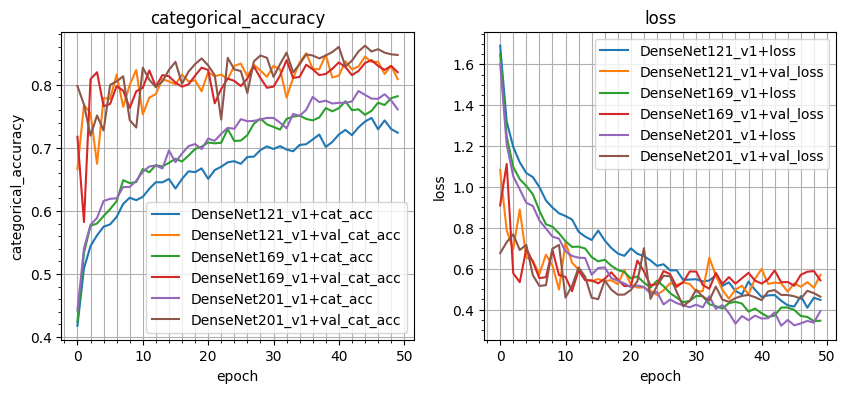

In [30]:
group5_display_lc2(history=histories,
                   model_names = ['DenseNet121_v1', 'DenseNet169_v1', 'DenseNet201_v1'])

Available Metrics1: ['categorical_accuracy', 'loss']

Here1: metrics: ['categorical_accuracy' 'loss']

Metrics to display: ['categorical_accuracy' 'loss']

Num Rows:  1
plotA 0 train/val curves for metric categorical_accuracy

plotA 1 train/val curves for metric loss

plotA 0 train/val curves for metric categorical_accuracy

plotA 1 train/val curves for metric loss

plotA 0 train/val curves for metric categorical_accuracy

plotA 1 train/val curves for metric loss



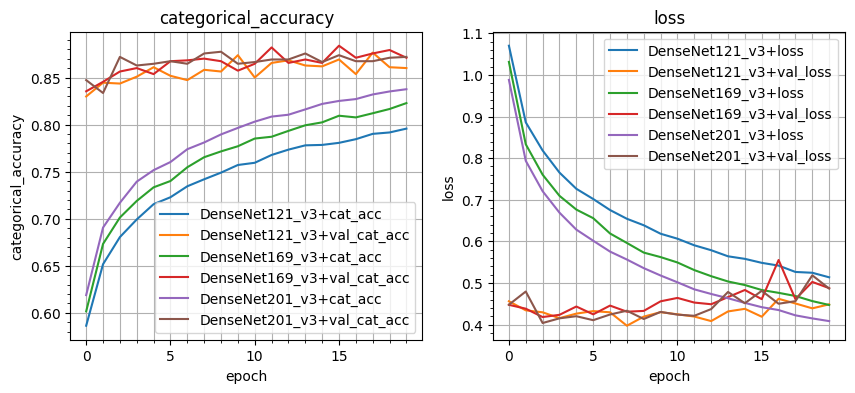

In [32]:
group5_display_lc2(history=histories,
                   model_names = ['DenseNet121_v3', 'DenseNet169_v3', 'DenseNet201_v3'])

In [ ]:
group5_display_lc2(history=histories,
                   model_names = ['DenseNet121_v3', 'DenseNet169_v3', 'DenseNet201_v3'])

Available Metrics1: ['categorical_accuracy', 'loss']

Here1: metrics: ['categorical_accuracy' 'loss']

Metrics to display: ['categorical_accuracy' 'loss']

Num Rows:  1
plotA 0 train/val curves for metric categorical_accuracy

plotA 1 train/val curves for metric loss

plotA 0 train/val curves for metric categorical_accuracy

plotA 1 train/val curves for metric loss



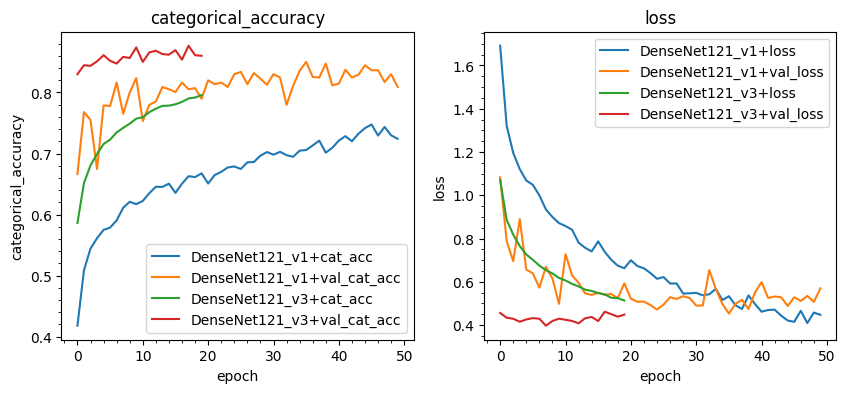

In [33]:
group5_display_lc2(history=histories,
                   model_names = ['DenseNet121_v1', 'DenseNet121_v3'])